In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pathlib import Path

In [4]:

CLEAN_PATH = Path("/Users/nadaashraf/Heart_Disease_Project/data/cleaned_heart.csv")
assert CLEAN_PATH.exists(), f"Missing {CLEAN_PATH}. Run 01_data_preprocessing first."

df = pd.read_csv(CLEAN_PATH)
print("Cleaned shape:", df.shape)
df.head()

Cleaned shape: (920, 23)


,id,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,-1.730169,1.007386,0.705176,0.303643,True,0.489727,False,1.368109,-0.361400,0,...,False,False,False,True,False,False,False,False,False,False
1,-1.726404,1.432034,1.518569,0.789967,False,-1.181478,True,0.611589,4.411152,2,...,False,False,False,False,False,False,True,False,True,False
2,-1.722639,1.432034,-0.650479,0.266939,False,-0.345875,True,1.651804,2.820301,1,...,False,False,False,False,False,False,True,False,False,True
3,-1.718873,-1.752828,-0.108217,0.459634,False,1.961979,False,2.502889,-0.361400,0,...,False,False,True,False,True,False,False,False,True,False
4,-1.715108,-1.328180,-0.108217,0.037541,False,1.365120,False,0.517024,-0.361400,0,...,False,True,False,False,False,False,False,True,True,False


In [5]:
# Separate the inputs from the target feature
X = df.drop("num", axis=1)
y = df["num"]


In [6]:
pca = PCA()                
X_pca = pca.fit_transform(X)

expl = pca.explained_variance_ratio_
cum  = np.cumsum(expl)

pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(expl))],
    "ExplainedVariance": expl,
    "Cumulative": cum
}).head(10)


,PC,ExplainedVariance,Cumulative
0,PC1,0.225459,0.225459
1,PC2,0.181238,0.406697
2,PC3,0.110497,0.517194
3,PC4,0.086948,0.604142
4,PC5,0.080179,0.684321
5,PC6,0.071236,0.755557
6,PC7,0.047648,0.803205
7,PC8,0.032248,0.835454
8,PC9,0.029825,0.865279
9,PC10,0.027442,0.892721


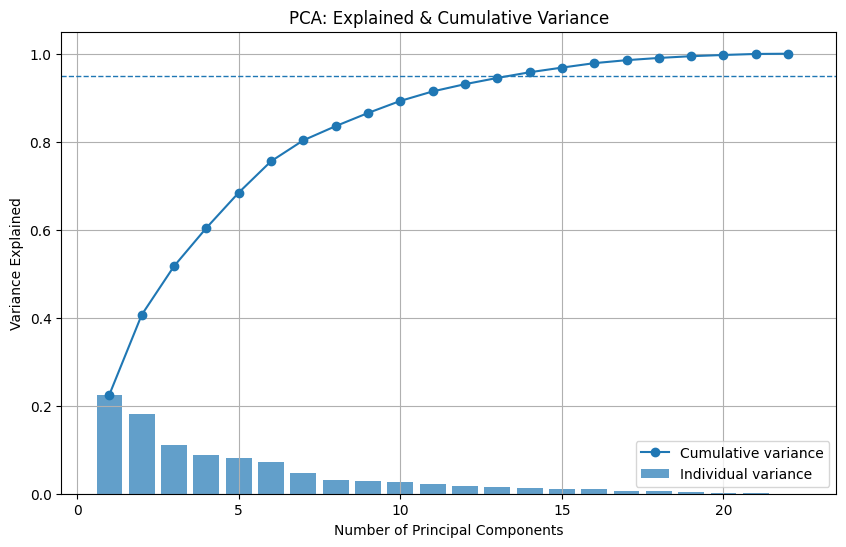

In [7]:
plt.figure(figsize=(10,6))
plt.bar(range(1, len(expl)+1), expl, alpha=0.7, label="Individual variance")
plt.plot(range(1, len(cum)+1), cum, marker="o", label="Cumulative variance")
plt.axhline(0.95, linestyle="--", linewidth=1)  # 95% reference
plt.xlabel("Number of Principal Components")
plt.ylabel("Variance Explained")
plt.title("PCA: Explained & Cumulative Variance")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
n_components = int(np.argmax(cum >= 0.95) + 1)
print(f"Components for ≥95% variance: {n_components}")


Components for ≥95% variance: 14


In [9]:
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X)

pca_cols = [f"PC{i+1}" for i in range(n_components)]
df_pca = pd.DataFrame(X_pca_final, columns=pca_cols)
df_pca["num"] = y.values

print("PCA dataset shape:", df_pca.shape)
df_pca.head()


PCA dataset shape: (920, 15)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,num
0,-0.479030,1.815900,0.274983,-0.069995,-0.873810,0.743473,-1.394204,-0.410292,-0.107327,-0.646452,-0.048162,-0.689835,0.592964,-0.543183,0
1,-0.154861,4.671157,-0.675366,-0.975615,1.011715,-1.559470,1.244880,0.633568,0.793254,-0.316362,0.033907,0.651929,0.589287,-0.475456,2
2,-0.300344,3.630161,-1.877619,0.645023,0.525540,-0.390608,0.051907,-0.206943,-0.510908,-0.664240,-0.199294,0.337845,0.287077,-0.026620,1
3,-2.414399,0.700673,0.119480,1.896129,-2.368067,0.913857,-0.353416,0.234887,0.194038,-0.066139,0.969305,-0.451249,0.313364,-0.203115,0
4,-2.338155,-0.031794,-0.165065,0.202463,-1.344347,0.470012,-0.615611,-0.209072,1.028640,-0.336503,-0.545543,-0.357043,-0.458689,-0.458058,0


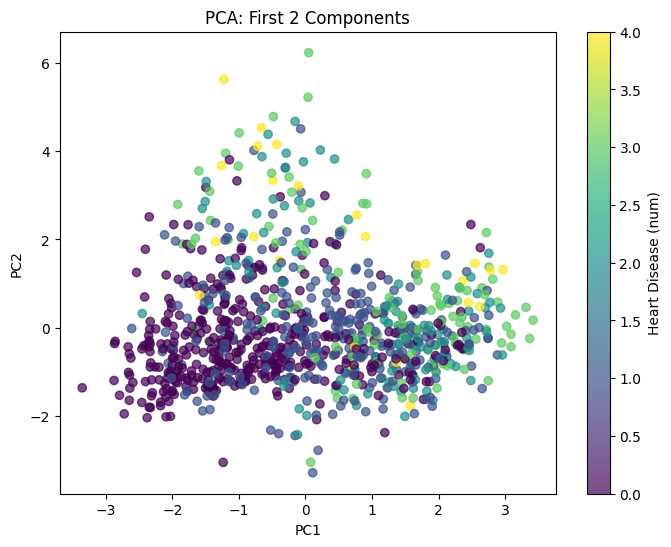

In [10]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["num"], alpha=0.7)
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title("PCA: First 2 Components")
cbar = plt.colorbar(scatter); cbar.set_label("Heart Disease (num)")
plt.show()


In [12]:
OUT_PCA = Path("/Users/nadaashraf/Heart_Disease_Project/data/heart_pca.csv")
df_pca.to_csv(OUT_PCA, index=False)
print("Saved:", OUT_PCA.resolve())


Saved: /Users/nadaashraf/Heart_Disease_Project/data/heart_pca.csv
